In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from potentials import yukawa, exponential_cosine, double_yukawa

In [2]:
# Using seaborn's style
#plt.style.use('science')
#plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-dark-palette')
#plt.style.use('seaborn-deep')


width = 345

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)


def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [9]:
k = '0.1'
df_yk = pd.read_pickle('yukawa/output/data_k%s.pkl'%k)
df_ec = pd.read_pickle('exp_cosine/output/data_k%s.pkl'%k)
df_dyk = pd.read_pickle('double_yukawa/output/data_k%s.pkl'%k)

In [5]:
# def adjust_spines(ax, spines, pos=10):
#     for loc, spine in ax.spines.items():
#         if loc in spines:
#             spine.set_position(('outward', pos))  # outward by 10 points
#             spine.set_smart_bounds(True)
#         else:
#             spine.set_color('none')  # don't draw spine
            
# r = np.linspace(0.1, 8, 100)

# img_yk = [yukawa(q=1, r=ri, V_0=5) for ri in r]
# img_ec = [exponential_cosine(q=1.5, r=ri, V_0=5) for ri in r]
# img_dyk = [double_yukawa(q1=1.5, q2=3.0, r=ri, V_01=10, V_02=20) for ri in r]

# fig, ax = plt.subplots(1, 1, figsize=set_size(345, fraction=1), frameon=False)
# #fig, ax = plt.subplots(1, 1)

# plt.plot(r, img_yk, '.--',label='TF' , linewidth=0.5, markersize=4)
# plt.plot(r, img_ec, '.--',label='EC', linewidth=0.5, markersize=4)
# plt.plot(r, img_dyk, '.--',label='DY', linewidth=0.5, markersize=4)
# plt.axhline(y=0, color='grey', linestyle='--', linewidth=0.8)

# plt.xlabel('$r$')
# plt.ylabel('$V~(r)$')
# plt.legend()
# plt.title('Potential images')
# plt.legend(frameon=False)
# plt.xlim(0, 3)
# plt.ylim(-10, 10)

# # for spine in ['top', 'right']:
# #     ax.spines[spine].set_visible(False)

# adjust_spines(ax, ['bottom', 'left'], pos=5)

# plt.tight_layout()
# #plt.savefig('plot_images.pdf', format='pdf')
# plt.show()

In [23]:
len(r)

99

q =  1.00004913778
q =  1.2034079434
q =  1.42089907701
q =  1.62036124308
q =  1.80106521786
q =  1.99902951988


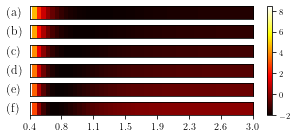

In [101]:
fig, axs = plt.subplots(6, 1, figsize=(5, 2), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

r = np.arange(0.1, 6, 0.06)
labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
axs = axs.ravel()

for i, j in enumerate([0, 200, 400, 600, 800, 999]):
    tdf = df_dyk.sort_values(by=['q'])
    print('q = ', tdf.iloc[j]['q'])
    data = tdf.iloc[j]['V'][2:]
    data = data.reshape(len(r)-2, 1)

    im = axs[i].imshow( data.T, cmap='hot', interpolation='nearest', aspect="auto" )
    axs[i].text(-0.1, 0.3, labels[i], transform=axs[i].transAxes, size=12)
    axs[i].set_xlim(0, 50)
    axs[i].set(xticks=[], yticks=[])

plt.xticks(
    np.linspace(0, 50, 8),
    [round(r, 1) for r in np.linspace(0.4, 3, 8)],
    rotation='horizontal',
    size=10)
cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=1.0)

#plt.savefig('plot_images.pdf')
plt.show()

In [102]:
r[2]

0.22